<a href="https://colab.research.google.com/github/lgkartik/mlmadeeasy/blob/master/emotion_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## emotion classification using keras

In [0]:
#importing all the required library
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D,BatchNormalization,Activation
import os
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
#images for training and testing path
train_path ='/home/kklg/Desktop/computer_vision_udemy/fer2013/train/'
test_path ='/home/kklg/Desktop/computer_vision_udemy/fer2013/validation/'

## image processing using keras

In [0]:
#image preprocessing with keras image processing funcitons
train_datagenerator =ImageDataGenerator(rescale =1/255.0,rotation_range=20,width_shift_range=0.3,
                                       height_shift_range=0.3,
                                        zoom_range=0.2,
                                       shear_range=0.2)
test_datagenerator =ImageDataGenerator(rescale=1/255.0)

In [0]:
train_datagen = train_datagenerator.flow_from_directory(train_path,target_size =(48,48),batch_size=16,
                                                       color_mode='grayscale',
                                                       class_mode='categorical')

test_datagen = test_datagenerator.flow_from_directory(test_path,target_size=(48,48),
                                                     batch_size=16,
                                                     color_mode='grayscale',
                                                     class_mode='categorical')


Found 28273 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


## Building the neural network

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                input_shape =(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                input_shape =(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(6,kernel_initializer='he_normal'))
model.add(Activation('softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#summary of the neural network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
__________

In [0]:
#compiling the neural network
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr =0.001),loss='categorical_crossentropy',metrics =['accuracy'])


## training the neural network

In [0]:
history = model.fit_generator(train_datagen,steps_per_epoch=28273//16,
                             validation_data=test_datagen,
                             validation_steps=3534//16,
                             epochs=20,
                         )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1767/1767 [==============================] - 1058s 599ms/step - loss: 1.8510 - acc: 0.2225 - val_loss: 1.7285 - val_acc: 0.2582
Epoch 2/20
1767/1767 [==============================] - 1111s 629ms/step - loss: 1.7080 - acc: 0.2753 - val_loss: 1.7054 - val_acc: 0.2990
Epoch 3/20
1767/1767 [==============================] - 1157s 655ms/step - loss: 1.5255 - acc: 0.3792 - val_loss: 1.6168 - val_acc: 0.4070
Epoch 4/20
1767/1767 [==============================] - 1342s 759ms/step - loss: 1.4119 - acc: 0.4388 - val_loss: 1.4706 - val_acc: 0.4565
Epoch 5/20
1767/1767 [==============================] - 2393s 1s/step - loss: 1.3373 - acc: 0.4727 - val_loss: 1.5014 - val_acc: 0.4528
Epoch 6/20
1767/1767 [==============================] - 964s 546ms/step - loss: 1.2852 - acc: 0.5004 - val_loss: 1.3743 - val_acc: 0.4744
Epoch 7/20
1767/1767 [==============================] - 1258s 712ms/step - loss: 1.2494 - acc: 0.5184 - val_loss: 1.4926 -

In [0]:
#saving the model
model.save('/home/kklg/Desktop/computer_vision_udemy/fer2013/model.h5')

In [0]:
from keras.models import load_model

In [0]:
#loading the model
model = load_model('/home/kklg/Desktop/computer_vision_udemy/fer2013/model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


## testing the above model

In [0]:
#testing the prediction
test_path ='/home/kklg/Desktop/computer_vision_udemy/fer2013/validation'
import pathlib
from keras.preprocessing.image import load_img,img_to_array
import cv2
import numpy as np
dic = train_datagen.class_indices
new_dict = dict([(value, key) for key, value in dic.items()])

{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}

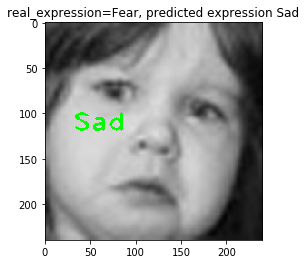

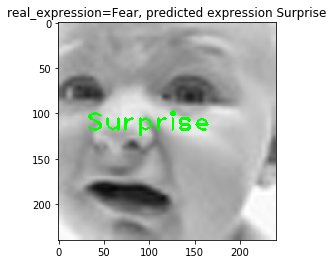

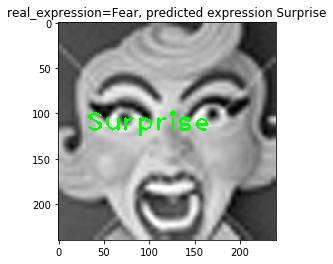

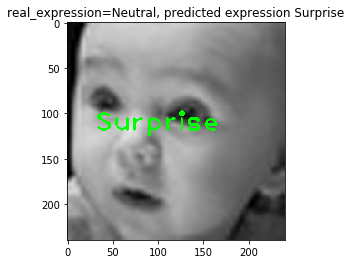

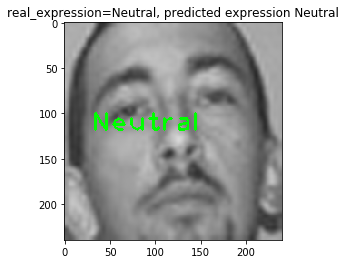

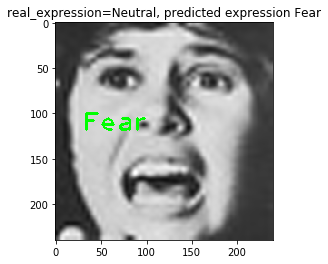

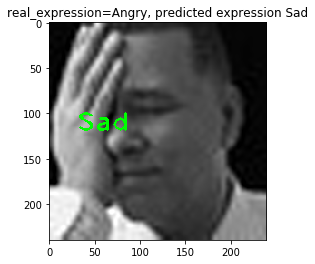

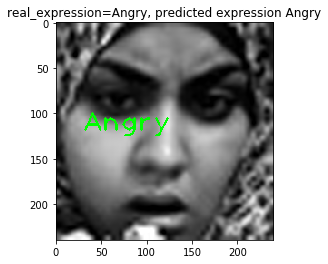

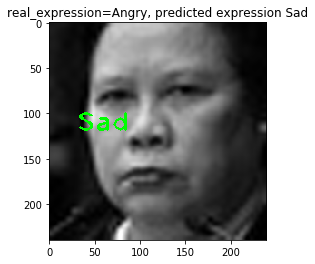

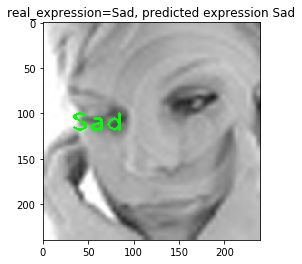

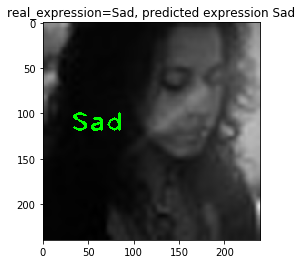

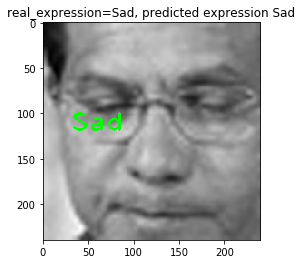

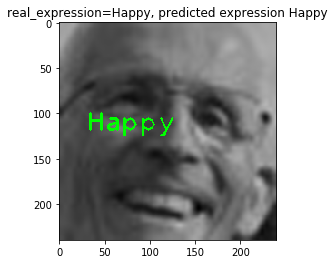

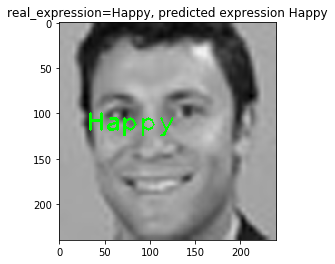

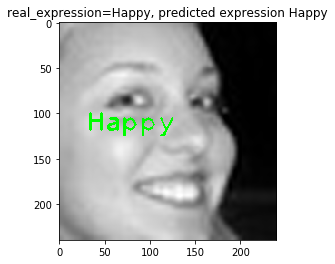

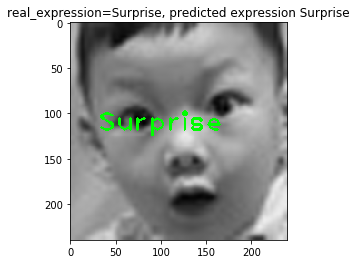

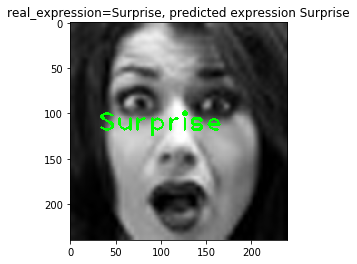

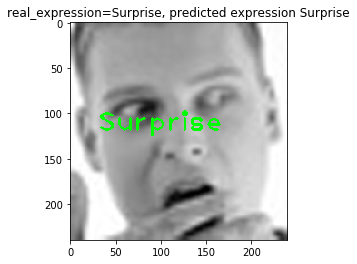

In [0]:
for folder in os.listdir(test_path):
    real_path = os.path.join(test_path,folder)
    count =0
    for file in pathlib.Path(real_path).iterdir():
        if count<3:
            file_str = str(file)
            image = cv2.imread(file_str)
            image = cv2.resize(image,None,fx=5,fy=5,interpolation=cv2.INTER_CUBIC)
            x1 = image.shape[0]//8
            y1 =image.shape[1]//2
            y2=y1-50
            x2=x1
            img = load_img(file,color_mode='grayscale')
            img = img_to_array(img)
            img = np.reshape(img,[1,img.shape[0],img.shape[1],img.shape[2]])
            img = img/255.0
            id_pred = model.predict_classes(img)
            name = new_dict[id_pred[0]]
            cv2.putText(image,name,(x1,y1),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
            
            plt.imshow(image)
            plt.title('real_expression='+str(folder)+', predicted expression '+name)
            plt.show()

            
            count = count+1

## the validation accuracy is not that much good.it can be increased by fine tuning the model

## expression classificaton with detecting face with cascadeclassifier

In [0]:
import numpy as np 
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


In [0]:
#function which will detect the face and classify the expression
def classifier(img):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,3)
    for (x,y,w,h) in faces:
        cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        
        roi_gray = cv.resize(roi_gray,(48,48),interpolation=cv.INTER_AREA)
        cv2.imwrite('image.jpg',roi_gray)
        roi_gray = load_img('image.jpg',color_mode='grayscale')
        roi_gray = img_to_array(roi_gray)
        roi_gray = np.expand_dims(roi_gray,axis=0)
        roi_gray = roi_gray/255.0
        y_pred = model.predict_classes(roi_gray)
        name_predict = new_dict[y_pred[0]]
        cv2.putText(img,name_predict,(x,y+10),cv2.FONT_HERSHEY_PLAIN,5,(255,0,0),2)
    
    return img
    

In [0]:
#testing some of the images
path ='/home/kklg/Desktop/computer_vision_udemy/fer2013/image_test'
i=0
for file in pathlib.Path(path).iterdir():
    file =str(file)
    image =cv2.imread(file)
    img =classifier(image)
    name ='image'+str(i)+'.jpg'
    cv2.imwrite(name,img)
    i=i+1
    

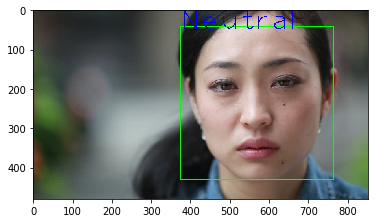

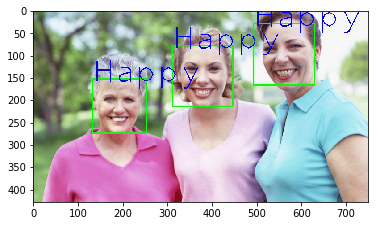

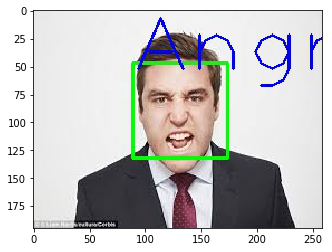

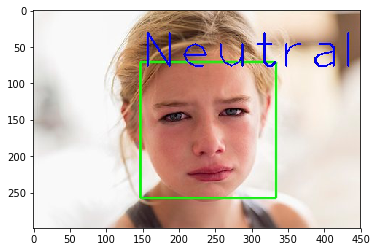

In [0]:
#showing the output
output ='/home/kklg/Desktop/computer_vision_udemy/fer2013/output'
for file in pathlib.Path(output).iterdir():
    img = plt.imread(file)
    img = plt.imshow(img)
    plt.show()

## there are two miss classification.sad is classified as Neutral

In [0]:
#expression recognition with webcam
import numpy as np 
import cv2
cap =cv2.VideoCapture(0)
while(True):
    ret,frame=cap.read()
    image =classifier(frame)
    
    cv2.imshow('frame',image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cvtColor


## the above code will capture the video frame wise and classify the emotion.the picture's attached below are some of the screenshot

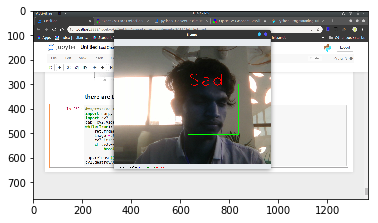

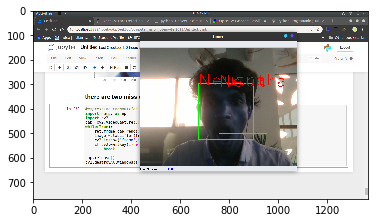

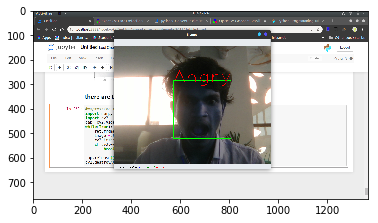

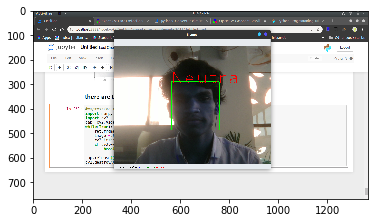

In [0]:
output ='/home/kklg/Desktop/computer_vision_udemy/fer2013/cam_output'
for file in pathlib.Path(output).iterdir():
    file = str(file)
    img = cv2.imread(file)
    plt.imshow(img)
    plt.show()
   

In [0]:
#########################end#############################